In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. 選擇3個⽉到期與10年到期的債券, 分別計算資料期間內的報酬率並以表格呈現結果

In [3]:
df = pd.read_csv(r'C:\Users\linnn\Desktop\加密貨幣金融\債券資料.csv')
df.head()

,申報年月,機構代碼,機構名稱,債券代碼,債券簡稱,債券種類,債券期,債券別,發行日期,到期日期,...,年化收益率,投資收益率計算方法,投資收益率計算方法說明,連結標的說明,提前出場條件,提前出場條件說明,銷售對象,備註.1,可持續發展連結債券(SLB)重要條件說明,SLB債券本息支付條件是否發生變動
0,202209,000815,台新證券,B9AB01,P09台新證1,普通公司債,109-1,$M00000001,109/1/10,119/1/10,...,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202209,000930,華南永昌,B92602,P09永昌證1,普通公司債,109-1,$M00000001,109/12/8,115/12/8,...,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202209,000980,元大證券,B9A602,P08元大證1B,普通公司債,108-1,乙,108/6/6,118/6/6,...,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202209,000980,元大證券,B9A601,P08元大證1A,普通公司債,108-1,甲,108/6/6,115/6/6,...,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202209,000980,元大證券,B9A604,P09元大證2,普通公司債,109-1,乙,109/10/20,119/10/20,...,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


先將民國轉成西元年

In [9]:
time_start = df['發行日期']

for i in range(len(time_start)):
    time_start[i] = time_start[i].replace(time_start[i][0:3],str(int(time_start[i][0:3]) + 1911))
time_start = pd.to_datetime(time_start,format = '%Y/%m/%d')

time_start

<ipython-input-9-b56900eb3a10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_start[i] = time_start[i].replace(time_start[i][0:3],str(int(time_start[i][0:3]) + 1911))


0      2020-01-10
1      2020-12-08
2      2019-06-06
3      2019-06-06
4      2020-10-20
          ...    
1074   2020-12-16
1075   2020-12-15
1076   2021-04-19
1077   2021-04-16
1078   2019-07-15
Name: 發行日期, Length: 1079, dtype: datetime64[ns]

In [10]:
time_end = df['到期日期']

for i in range(len(time_end)):
    time_end[i] = time_end[i].replace(time_end[i][0:3],str(int(time_end[i][0:3]) + 1911))
time_end = pd.to_datetime(time_end,format = '%Y/%m/%d')

time_end

<ipython-input-10-5a4e55230fbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_end[i] = time_end[i].replace(time_end[i][0:3],str(int(time_end[i][0:3]) + 1911))


ValueError: time data 21140/1/10 doesn't match format specified

In [8]:
time_end = df['到期日期']

for i in range(len(time_end)):
    time_end[i] = time_end.iloc[i].replace(time_end.iloc[i][0:3],str(int(time_end.iloc[i][0:3])+ 1911))
time_end = pd.to_datetime(time_end,format = '%Y/%m/%d')
time_end

<ipython-input-8-65b36ab276ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_end[i] = time_end.iloc[i].replace(time_end.iloc[i][0:3],str(int(time_end.iloc[i][0:3])+ 1911))


ValueError: time data 21010/1/0 doesn't match format specified

In [58]:
time_end.iloc[1]

'2026/12/8'

In [57]:
time_end[1][0:3]

'202'

2. 選擇任⼀美股, 根據美股價格算出每⽇報酬率, 並計算出平均⽇報酬後進⾏年化, 得到年化後的平均
報酬率

In [122]:
import yfinance as yf
df = yf.Ticker('GOOG').history(period='max')
df = df[['Close']]
df.columns = ['price']
df = df['2019':]
df

,price
Date,
2019-01-02,52.292500
2019-01-03,50.803001
2019-01-04,53.535500
2019-01-07,53.419498
2019-01-08,53.813999
...,...
2022-10-26,94.820000
2022-10-27,92.599998
2022-10-28,96.580002


In [123]:
ROI = df.price.pct_change()      #每日報酬
ROI = pd.DataFrame(ROI)
ROI

,price
Date,
2019-01-02,NaN
2019-01-03,-0.028484
2019-01-04,0.053786
2019-01-07,-0.002167
2019-01-08,0.007385
...,...
2022-10-26,-0.096350
2022-10-27,-0.023413
2022-10-28,0.042981


In [124]:
start = '2019-01-02'
end = '2022-10-28'
df_slice = df.loc[start:end]
df_slice

,price
Date,
2019-01-02,52.292500
2019-01-03,50.803001
2019-01-04,53.535500
2019-01-07,53.419498
2019-01-08,53.813999
...,...
2022-10-24,102.970001
2022-10-25,104.930000
2022-10-26,94.820000


In [36]:
TR = df_slice.iloc[-1] / df_slice.iloc[0] - 1     #總報酬
TR

price    0.846919
dtype: float64

In [37]:
days = len(df_slice)
days

965

In [38]:
IRR = (1+TR)**(252/days)-1    #年化報酬率
IRR

price    0.173762
dtype: float64

3. 畫出比特幣價格趨勢圖

In [3]:
import yfinance as yf
btc = yf.Ticker('BTC-USD').history(period='max')
btc = btc[['Close']]
btc

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-10-29,20818.476562
2022-10-30,20635.603516
2022-10-31,20495.773438


<AxesSubplot:xlabel='Date'>

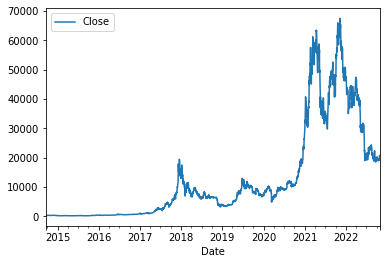

In [4]:
btc.plot()

4. 建立⼀資料表格, 欄位包含比特幣價格, 今⽇報酬率, 前⼀⽇報酬率, 共三個欄位變數


In [5]:
oo = btc.copy()
mm = btc.copy()
oo

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-10-29,20818.476562
2022-10-30,20635.603516
2022-10-31,20495.773438


In [6]:
#今日報酬率
today = float(oo.loc['2022-11-01'])
yesterday = float(oo.loc['2022-10-31'])
R = (today - yesterday) / yesterday
R = round(R,10)
R

-0.0005123007

In [7]:
#昨日報酬率
y = float(oo.loc['2022-10-31'])
yy = float(oo.loc['2022-10-30'])
f = (y - yy) / yy
f = round(f,10)
f

-0.0067761565

In [8]:
mm = mm[-1:]
mm.columns = ['price']
mm['Today_ROI'] = R
mm['Yesterday_ROI'] = f
mm

,price,Today_ROI,Yesterday_ROI
Date,,,
2022-11-02,20528.744141,-0.000512,-0.006776


5. 我們根據以下條件計算其機率
  1. 在2022年, 比特幣⽇報酬率超過3%的機率
  2. 在資料期間, 比特幣⽇報酬率超過3%的機率
  3. 在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率

In [9]:
#2022比特幣日報酬率
btcc = btc.copy()
btcc = btc['2022']
btcc.columns = ['price']
btcc['ROI'] = btcc.price.pct_change()
btcc

<ipython-input-9-d11d59b0d9ca>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  btcc = btc['2022']
<ipython-input-9-d11d59b0d9ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcc['ROI'] = btcc.price.pct_change()


,price,ROI
Date,,
2022-01-01,47686.812500,NaN
2022-01-02,47345.218750,-0.007163
2022-01-03,46458.117188,-0.018737
2022-01-04,45897.574219,-0.012066
2022-01-05,43569.003906,-0.050734
...,...,...
2022-10-29,20818.476562,0.010834
2022-10-30,20635.603516,-0.008784
2022-10-31,20495.773438,-0.006776


In [19]:
btcc['ROI'] > 0.03           #找出比特幣報酬>3%的資料

Date
2022-01-01    False
2022-01-02    False
2022-01-03    False
2022-01-04    False
2022-01-05    False
              ...  
2022-10-29    False
2022-10-30    False
2022-10-31    False
2022-11-01    False
2022-11-02    False
Name: ROI, Length: 306, dtype: bool

In [20]:
btcc[(btcc['ROI'] > 0.03)]

,price,ROI
Date,,
2022-01-23,36276.804688,0.035585
2022-02-04,41500.875000,0.116978
2022-02-07,43840.285156,0.033666
2022-02-15,44575.203125,0.046688
2022-02-22,38286.027344,0.032656
2022-02-28,43193.234375,0.145412
2022-03-09,41982.925781,0.083786
2022-03-14,39666.753906,0.048008
2022-03-16,41143.929688,0.045887


In [21]:
print('報酬高於3%的資料數量',len(btcc[(btcc['ROI'] > 0.03)]))
print('2022的資料總量',len(btcc))

報酬高於3%的資料數量 34
2022的資料總量 306


In [38]:
probability = len(btcc[(btcc['ROI'] > 0.03)]) / len(btcc) * 100
probability = round(probability,2)
probability

11.11

In [39]:
print('2022年, 比特幣⽇報酬率超過3%的機率',probability,'%')

2022年, 比特幣⽇報酬率超過3%的機率 11.11 %


在資料期間, 比特幣⽇報酬率超過3%的機率

In [28]:
btc2 = btc.copy()
btc2.columns = ['price']
btc2['ROI'] = btc2.price.pct_change()
btc2

,price,ROI
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-0.071926
2014-09-19,394.795990,-0.069843
2014-09-20,408.903992,0.035735
2014-09-21,398.821014,-0.024659
...,...,...
2022-10-29,20818.476562,0.010834
2022-10-30,20635.603516,-0.008784
2022-10-31,20495.773438,-0.006776


In [31]:
print('到目前ROI>3%的資料量',len(btc2[(btc2['ROI'] > 0.03)]))
print('全部資料的總量',len(btc2))

到目前ROI>3%的資料量 464
全部資料的總量 2969


In [42]:
probability2 = len(btc2[(btc2['ROI'] > 0.03)]) / len(btc2) * 100
probability2 = round(probability2,2)
probability2

15.63

In [43]:
print('在資料期間, 比特幣⽇報酬率超過3%的機率',probability2,'%')

在資料期間, 比特幣⽇報酬率超過3%的機率 15.63 %


在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率

In [64]:
pp = btc2[btc2['ROI'] > 0.03]
pp

,price,ROI
Date,,
2014-09-20,408.903992,0.035735
2014-09-23,435.790985,0.083647
2014-09-30,386.944000,0.030567
2014-10-08,352.940002,0.049832
2014-10-09,365.026001,0.034244
...,...,...
2022-09-22,19413.550781,0.046699
2022-10-03,19623.580078,0.030428
2022-10-04,20336.843750,0.036347


In [80]:
k = 0 
for i in range(len(pp)-1):
    if((pp.index[i+1] - pp.index[i]).days == 1) == True:
        print(pp.index[i+1])
        k += 1
print('在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率的資料數量為',k,'筆')

2014-10-09 00:00:00
2014-10-13 00:00:00
2015-01-06 00:00:00
2015-02-02 00:00:00
2015-02-14 00:00:00
2015-08-20 00:00:00
2015-10-29 00:00:00
2015-10-30 00:00:00
2015-11-02 00:00:00
2015-11-03 00:00:00
2016-05-28 00:00:00
2016-06-12 00:00:00
2016-06-13 00:00:00
2016-06-24 00:00:00
2016-12-22 00:00:00
2016-12-23 00:00:00
2017-02-21 00:00:00
2017-03-12 00:00:00
2017-05-20 00:00:00
2017-05-23 00:00:00
2017-05-24 00:00:00
2017-05-29 00:00:00
2017-06-01 00:00:00
2017-06-02 00:00:00
2017-06-06 00:00:00
2017-07-18 00:00:00
2017-07-28 00:00:00
2017-08-04 00:00:00
2017-08-05 00:00:00
2017-08-12 00:00:00
2017-08-13 00:00:00
2017-08-14 00:00:00
2017-09-01 00:00:00
2017-09-06 00:00:00
2017-10-09 00:00:00
2017-10-13 00:00:00
2017-10-14 00:00:00
2017-11-01 00:00:00
2017-11-02 00:00:00
2017-11-16 00:00:00
2017-11-26 00:00:00
2017-11-27 00:00:00
2017-12-01 00:00:00
2017-12-07 00:00:00
2017-12-16 00:00:00
2018-02-09 00:00:00
2018-02-15 00:00:00
2018-02-27 00:00:00
2018-03-19 00:00:00
2018-03-20 00:00:00


In [85]:
pro = k / len(btc2) * 100
pro = round(pro,2)
print('在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率為',pro,'%')

在資料期間, 比特幣⽇報酬率連續兩天超過3%的機率為 2.93 %


6. 計算美股個股, 股價指數和比特幣⽇報酬率計算出年化平均⽇報酬, 年化標準差, 最⼤與最⼩值, 以表
格⽅式呈現

In [109]:
google = yf.Ticker('GOOG').history(period='max')
google = google['2016':]
google = google[['Close']]
google.columns = ['price']
google['ROI'] = google.price.pct_change()
google

,price,ROI
Date,,
2016-01-04,37.091999,NaN
2016-01-05,37.129002,0.000998
2016-01-06,37.181000,0.001400
2016-01-07,36.319500,-0.023170
2016-01-08,35.723499,-0.016410
...,...,...
2022-10-26,94.820000,-0.096350
2022-10-27,92.599998,-0.023413
2022-10-28,96.580002,0.042981


In [114]:
btc3 = btc.copy()
btc3 = btc3['2016':]
btc3.columns = ['price']
btc3['ROI'] = btc3.price.pct_change()
btc3

,price,ROI
Date,,
2016-01-01,434.334015,NaN
2016-01-02,433.437988,-0.002063
2016-01-03,430.010986,-0.007907
2016-01-04,433.091003,0.007163
2016-01-05,431.959991,-0.002611
...,...,...
2022-10-29,20818.476562,0.010834
2022-10-30,20635.603516,-0.008784
2022-10-31,20495.773438,-0.006776


In [155]:
mm = pd.merge(btc3['ROI'],google['ROI'],left_index=True,right_index=True)
mm

,ROI_x,ROI_y
Date,,
2016-01-04,0.007163,NaN
2016-01-05,-0.002611,0.000998
2016-01-06,-0.006609,0.001400
2016-01-07,0.067450,-0.023170
2016-01-08,-0.010519,-0.016410
...,...,...
2022-10-26,0.033568,-0.096350
2022-10-27,-0.023331,-0.023413
2022-10-28,0.015258,0.042981


In [156]:
mm = mm.dropna(axis=0)          #刪除缺失值
mm

,ROI_x,ROI_y
Date,,
2016-01-05,-0.002611,0.000998
2016-01-06,-0.006609,0.001400
2016-01-07,0.067450,-0.023170
2016-01-08,-0.010519,-0.016410
2016-01-11,0.000975,0.002183
...,...,...
2022-10-26,0.033568,-0.096350
2022-10-27,-0.023331,-0.023413
2022-10-28,0.015258,0.042981


In [224]:
mm['ROI_x'][0] + mm['ROI_x'][1]

-0.009220851204396863

In [234]:
total_btc = 0
for i in range(len(mm)):
    total_btc += mm['ROI_x'][i]
total_btc = round(total_btc / len(mm),7)

print(total_btc)

0.0025442


In [235]:
total_google = 0
for i in range(len(mm)):
    total_google += mm['ROI_y'][i]
total_google = round(total_google / len(mm),7)
print(total_google)

0.0006727


In [241]:
#套入年化報酬率公式
IRR_btc = round((1 + total_btc)** (1/6) -1,7)
IRR_btc

0.0004236

In [238]:
#套入年化報酬率公式
IRR_google = round((1+total_google)**(1/6) - 1,7)
IRR_google                                       # Google的年化日報酬

0.0001121

年化標準差

In [260]:
mm

,ROI_x,ROI_y
Date,,
2016-01-05,-0.002611,0.000998
2016-01-06,-0.006609,0.001400
2016-01-07,0.067450,-0.023170
2016-01-08,-0.010519,-0.016410
2016-01-11,0.000975,0.002183
...,...,...
2022-10-26,0.033568,-0.096350
2022-10-27,-0.023331,-0.023413
2022-10-28,0.015258,0.042981


In [207]:
dr = mm
risk = dr.std()
risk

ROI_x    0.042171
ROI_y    0.017535
dtype: float64

In [208]:
risk_y = risk * 252 ** 0.5
risk_y

ROI_x    0.669441
ROI_y    0.278364
dtype: float64

<AxesSubplot:xlabel='Date'>

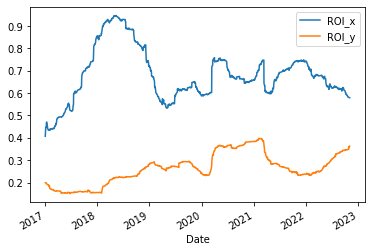

In [209]:
#年均線
rolling_risk = dr.rolling(252).std() *252 ** 0.5
rolling_risk.dropna().plot()

In [273]:
data = pd.DataFrame({IRR_btc},columns=['BTC 年化平均日報酬'])
data['Google 年化平均日報酬'] = IRR_google
data['BTC年化標準差'] = round(risk[0],4)
data['Google年化標準差'] = round(risk[1],4)
data['BTC日報酬率中最大值'] = mm['ROI_x'].max()
data['BTC日報酬率中最小值'] = mm['ROI_x'].min()
data['Google日報酬率中最大值'] = mm['ROI_x'].max()
data['Google日報酬率中最小值'] = mm['ROI_y'].min()
data = data.transpose()
data.columns = ['報酬率']
data

,報酬率
BTC 年化平均日報酬,0.000424
Google 年化平均日報酬,0.000112
BTC年化標準差,0.042200
Google年化標準差,0.017500
BTC日報酬率中最大值,0.252472
BTC日報酬率中最小值,-0.371695
Google日報酬率中最大值,0.252472
Google日報酬率中最小值,-0.111008


7. 計算美股股價指數⽇報酬(S&P 500 index)與比特幣⽇報酬之相關係數

In [9]:
import yfinance as yf
sp = yf.Ticker('^GSPC').history(period='max')
sp = sp[['Close']]
sp = sp['2016']
sp.columns = ['price']
sp['ROI'] = sp.price.pct_change()
sp = sp.dropna()
sp = sp.drop(columns=['price'])
sp

<ipython-input-9-fb586a165a0c>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sp = sp['2016']


,ROI
Date,
2016-01-05,0.002012
2016-01-06,-0.013115
2016-01-07,-0.023700
2016-01-08,-0.010838
2016-01-11,0.000853
...,...
2016-12-23,0.001252
2016-12-27,0.002248
2016-12-28,-0.008357


In [10]:
btc = yf.Ticker('BTC-USD').history(period='max')
btc = btc[['Close']]
btc.columns = ['price']
btc = btc['2016']
btc['ROI'] = btc.price.pct_change()
btc = btc.dropna()
btc = btc.drop(columns=['price'])
btc

<ipython-input-10-3442001ae382>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  btc = btc['2016']


,ROI
Date,
2016-01-02,-0.002063
2016-01-03,-0.007907
2016-01-04,0.007163
2016-01-05,-0.002611
2016-01-06,-0.006609
...,...
2016-12-27,0.028193
2016-12-28,0.045781
2016-12-29,-0.002484


In [27]:
combine = pd.merge(sp,btc,left_index=True,right_index=True)
combine.columns = ['SP500','BTC']
corr = combine['SP500'].corr(combine['BTC'])
corr = round(corr,5)
print(f"S&P 500 index與比特幣⽇報酬之相關係數為 {{}} ".format(corr))

S&P 500 index與比特幣⽇報酬之相關係數為 -0.05255 


8. 若要得到更進⼀步的實證結果, 我們可利⽤同期模型
了解兩變數的同期關係. 或者使⽤跨期模型(或是預測模型)

In [28]:
#同期模型
import statsmodels.api as sm
y = combine.BTC
x = sm.add_constant(combine[['SP500']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6894
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.407
Time:                        14:41:53   Log-Likelihood:                 564.08
No. Observations:                 251   AIC:                            -1124.
Df Residuals:                     249   BIC:                            -1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.002      1.237      0.2

1. Beta不顯著，因p-value < 0.05
2. 比特幣受美股有負向的影響(美股愈高，比特幣報酬就越低)

In [31]:
#預測模型
combine['SP500_ROI_1'] = combine.SP500.shift()
y = combine.BTC.shift()
combine

,SP500,BTC,SP500_ROI_1
Date,,,
2016-01-06,-0.013115,-0.006609,NaN
2016-01-07,-0.023700,0.067450,-0.013115
2016-01-08,-0.010838,-0.010519,-0.023700
2016-01-11,0.000853,0.000975,-0.010838
2016-01-12,0.007803,-0.028406,0.000853
...,...,...,...
2016-12-23,0.001252,0.066445,-0.001863
2016-12-27,0.002248,0.028193,0.001252
2016-12-28,-0.008357,0.045781,0.002248


In [32]:
x = sm.add_constant(combine[['SP500_ROI_1']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7199
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.397
Time:                        14:44:01   Log-Likelihood:                 558.78
No. Observations:                 249   AIC:                            -1114.
Df Residuals:                     247   BIC:                            -1107.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0021      0.002      1.277      